In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sqrt

from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing        # single Exponential Smoothing (SES)
from statsmodels.tsa.holtwinters import Holt                      # double Exponential Smoothing (holt method)
from statsmodels.tsa.holtwinters import ExponentialSmoothing        # triple Exponential Smoothing (holt winter method)

### 1. importing data

In [3]:
data = pd.read_csv("CocaCola.csv")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### 2.1 getting data ready

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [8]:
#so we have 42 records of data and there is no null value

### 2.2 ploting of data

### 2.2.1 working on trend of data

<AxesSubplot:ylabel='Density'>

<Figure size 864x576 with 0 Axes>

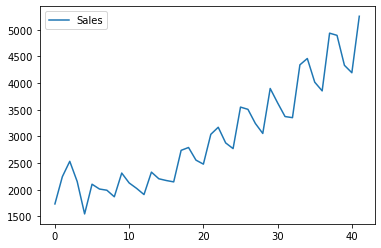

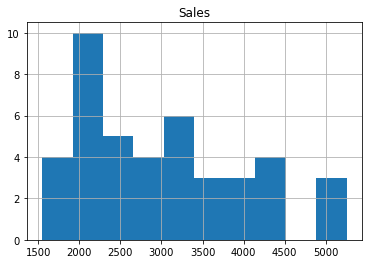

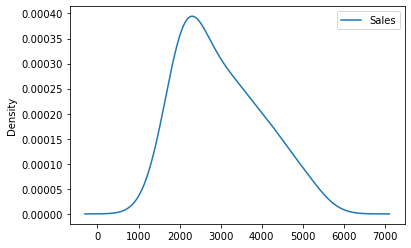

In [9]:
#figsize = plt.figaspect(0.618) 
plt.figure(figsize=(12,8))
data.plot()
data.hist()
data.plot(kind='kde')

In [10]:
# there is a trend 
# there is seasonality 

In [11]:
#note : trend of data is not linear, lets make it linear by taking square root

#### a) square root transform

In [12]:
data['Sales'] = sqrt(data['Sales'])
data.head()

,Quarter,Sales
0,Q1_86,41.651254
1,Q2_86,47.381019
2,Q3_86,50.336915
3,Q4_86,46.421579
4,Q1_87,39.342331


<AxesSubplot:ylabel='Density'>

<Figure size 864x576 with 0 Axes>

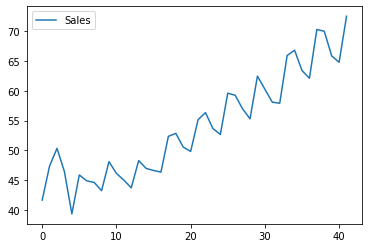

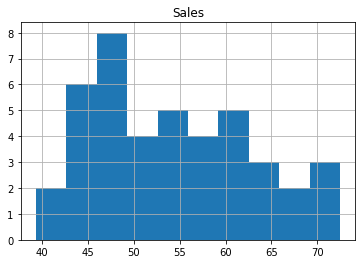

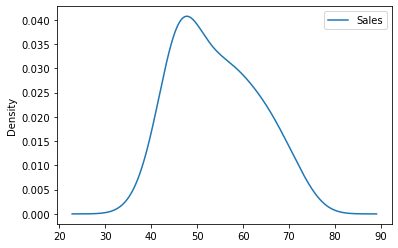

In [13]:
#figsize = plt.figaspect(0.618) 
plt.figure(figsize=(12,8))
data.plot()
data.hist()
data.plot(kind='kde')

In [14]:
#note : now trend look like to be linear

### 2.2.2 working on seasonality of data

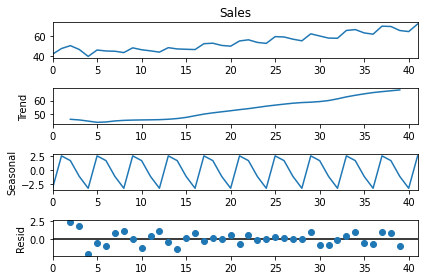

In [17]:
figsize = plt.figaspect(0.618) 
decompose_ts_add = seasonal_decompose(data.Sales,period=4)
decompose_ts_add.plot()
plt.show()

In [18]:
#i can clearly see seasonality in data

### 2.2.3 lag plot

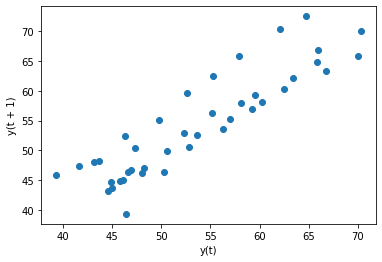

In [19]:
lag_plot(data['Sales'])
plt.show()

### 2.2.4 AcF and PACF

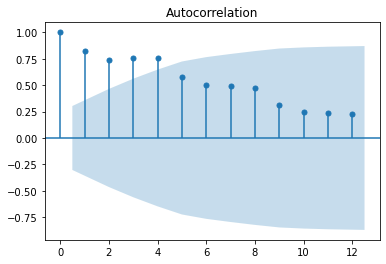

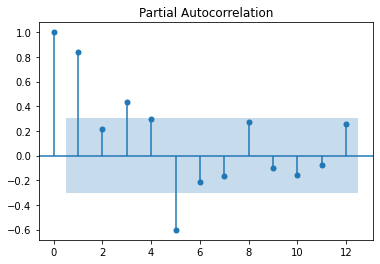

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

### 2.3 splitting the data

In [21]:
train_data = data.iloc[:30]
test_data = data.iloc[30:]

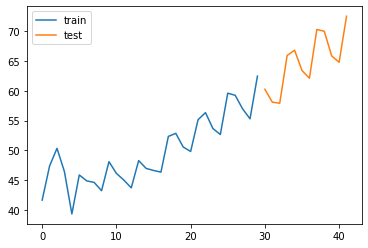

In [22]:
#figsize = plt.figaspect(0.618) 
#plt.figure(figsize=(12,8))
train_data['Sales'].plot(legend=True, label='train'),
test_data['Sales'].plot(legend=True, label='test');
#plt.plot()

In [23]:
# 1) we have done square root tranformation
# 2) there is trend in data
# 3) there is seasonality in data

# we go with smoothing technique (Holt-Winter method)

### 3. building model

#### a) fit the model

In [34]:
model = ExponentialSmoothing(train_data["Sales"], trend="add", seasonal="add", seasonal_periods=4) #add the trend to the model
model_fit = model.fit()

In [35]:
par = model.params
par

{'smoothing_level': 0.3293117487632375,
 'smoothing_trend': 0.3293117487626715,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 46.23094124065424,
 'initial_trend': -0.2560558216177125,
 'initial_seasons': array([-3.35849518,  2.06726   ,  1.5620277 , -0.76561304]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

#### b) forecasting the test data

In [36]:
test_pred  = model_fit.forecast(12)
test_pred

30    62.325426
31    60.780103
32    58.969540
33    65.177613
34    65.454699
35    63.909377
36    62.098813
37    68.306887
38    68.583973
39    67.038651
40    65.228087
41    71.436161
dtype: float64

In [37]:
#note : we can also use prediction for test data *****************************

# test_pred  = model.predict(par, start = test_data['Sales'].index[0], end = test_data['Sales'].index[-1])
# test_pred

In [38]:
test_prediction = pd.DataFrame()
test_prediction['Quarter'] = test_data.Quarter
test_prediction['Sales'] = test_data.Sales
test_prediction['test_pred_Sales'] = test_pred
test_prediction

,Quarter,Sales,test_pred_Sales
30,Q3_93,60.241182,62.325426
31,Q4_93,58.077534,60.780103
32,Q1_94,57.896459,58.969540
33,Q2_94,65.893854,65.177613
34,Q3_94,66.790718,65.454699
35,Q4_94,63.379808,63.909377
36,Q1_95,62.080593,62.098813
37,Q2_95,70.256672,68.306887
38,Q3_95,69.964277,68.583973
39,Q4_95,65.825527,67.038651


#### d) visualising the original test  data and predicted test data

[]

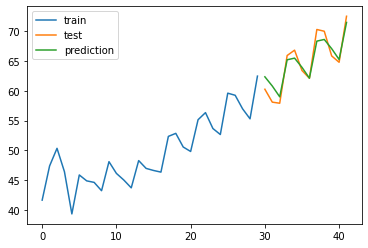

In [39]:
figsize = plt.figaspect(0.618) 
#plt.figure(figsize=(12,8))
train_data['Sales'].plot(legend=True, label='train')
test_data['Sales'].plot(legend=True, label='test')
test_prediction['test_pred_Sales'].plot(legend=True, label='prediction')
plt.plot()

In [40]:
#so trend for original test data and predicted test data is  nearly same

#### e) transforming sqrt to original form of data for test prediction DataFrame 

In [41]:
test_prediction['Sales'] = np.square(test_prediction['Sales'])
test_prediction['test_pred_Sales'] = np.square(test_prediction['test_pred_Sales'])
test_prediction.head()

,Quarter,Sales,test_pred_Sales
30,Q3_93,3629.0,3884.458704
31,Q4_93,3373.0,3694.220980
32,Q1_94,3352.0,3477.406620
33,Q2_94,4342.0,4248.121281
34,Q3_94,4461.0,4284.317680


#### e) evaluation of metrics

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_prediction['Sales'],test_prediction['test_pred_Sales'])            #MSE

32536.49919208213

In [43]:
np.sqrt(mean_squared_error(test_prediction['Sales'],test_prediction['test_pred_Sales']))   #RMSE

180.37876591240482

### 4. final model (forecasting into future)

#### a) fit the model

In [44]:
model = ExponentialSmoothing(data["Sales"], trend="add", seasonal="add", seasonal_periods=4) #add the trend to the model
model_fit = model.fit()

#### b) forecasting 

In [45]:
fore  = model_fit.forecast(20)
fore

42    71.687762
43    67.824511
44    66.984076
45    74.812531
46    73.976705
47    70.113454
48    69.273020
49    77.101475
50    76.265649
51    72.402398
52    71.561964
53    79.390419
54    78.554592
55    74.691342
56    73.850907
57    81.679362
58    80.843536
59    76.980285
60    76.139851
61    83.968306
dtype: float64

#### c) visualisation of data

<AxesSubplot:>

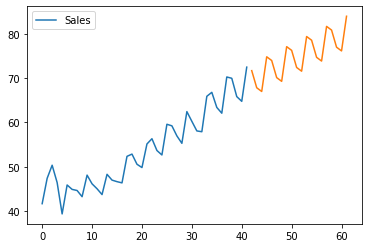

In [46]:
data.plot()
fore.plot()

#### d) transforming data from sqrt to original form

In [47]:
data['Sales'] = np.square(data['Sales']) 
fore = np.square(fore)

In [48]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [49]:
fore

42    5139.135184
43    4600.164281
44    4486.866496
45    5596.914855
46    5472.552930
47    4915.896500
48    4798.751301
49    5944.637444
50    5816.449201
51    5242.107245
52    5121.114632
53    6302.838558
54    6170.823998
55    5578.796515
56    5453.956488
57    6671.518197
58    6535.677320
59    5925.964310
60    5797.276869
61    7050.676362
dtype: float64

<AxesSubplot:>

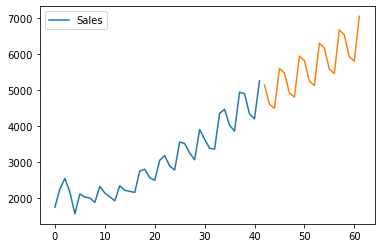

In [50]:
data.plot()
fore.plot()